## Практикум 6. Задание.

1. В разделе https://www.chipdip.ru/catalog-show/glass-fuses скачайте данные по первым 20
страницам, используя библиотеки requests и BeautifulSoup.
2. Распарсите полученные страницы в датафрейм df вида (используйте регулярные
выражения):

Бренд, Название, Артикул, ТОК, Номинальное напряжение, Размеры корпуса, Тип, Цена, Кол-во, Срок поставки

3. Выделите из названий предохранителей тип – (быстродействующий, медленного
срабатывания и обычный) и добавьте соответствующую новую колонку в датафрейм df.
4. Постройте группировку по переменной тип, в качестве агрегации используя - среднюю
цену, максимальное количество на складе, минимальное число артикулов в группе.
5. Проведите анализ качества предохранителей:

- 5.1. выявите самый лучший предохранитель внутри каждой категории, по техническим
характеристикам.
- 5.2. Определите индекс качества каждого предохранителя относительно лучшего в
категории – разделите значения характеристик на лучшие, и суммируйте
полученные числа.
- 5.3. Постройте три линейных графика – зависимость цены от индекса качества.

6. Определите ценовой сегмент для каждого предохранителя. Используйте полученные
ранее индексы качества.
7. Определите самый дефицитный предохранитель – с самым долгим сроком поставки, и
минимальным числом в наличии на складе.
8. Проверьте гипотезу о связи тока и номинального напряжения в предохранителях:

- 8.1. Разбейте ток и номинальное напряжение по две группы соответственно
- 8.2. Постройте таблицу сопряженности – группированный ток vs группированное
напряжение, с частотой предохранителей в ячейках.
- 8.3. Проведите по построенной таблице тест хи-квадрат (scipy.stats.chi_contingency)

9. Визуализируйте с помощью тепловой карты зависимость цены от группированного тока
и группированного напряжения
10. Постройте линейную регрессию и определите наиболее значимые характеристики
товара, влияющие на рост цены.

In [1]:
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from bs4 import BeautifulSoup
import time
import random
import re

#### 1. В разделе https://www.chipdip.ru/catalog-show/glass-fuses скачайте данные по первым 20 страницам, используя библиотеки requests и BeautifulSoup.

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
dr = webdriver.Chrome(options=options)

In [3]:
def extract(product_card):
    try:
        name = product_card.find('div', class_='item__name'). \
            find('a', class_='link').text
        print(name)
        price = product_card. \
            find('span', class_='price__value').text
        try:
            supply = product_card. \
                find('span', class_='item__avail item__avail_available nw').text
        except:
            supply = product_card. \
                find('span', class_='item__avail item__avail_delivery').text
        link = product_card.find('div', class_='item__name'). \
            find('a', class_='link')['href']

    except:
        name, price, supply, link = '', '', '', ''
    return pd.Series([name, price, supply, link], index=['name', 'price', 'supply', 'link'])

In [2]:
df = pd.DataFrame()

In [9]:
for i in range(1, 8):
    url = 'https://www.chipdip.ru/catalog-show/glass-fuses?ps=x3&page={}'.format(i)
    dr = webdriver.Chrome(options=options)
    dr.get(url)
    soup = BeautifulSoup(dr.page_source)
    print(i)
    tmp = pd.concat([extract(x) for x in soup.find('div', class_='items-column'). \
                    find_all('div', class_="item")], axis=1).transpose()
    df = pd.concat([df, tmp])
    time.sleep(random.randint(5, 15))

7
 Предохранитель 5x20, ток 3,0А, стекло, KF-0360B[ВПБ6]
 Предохранитель 5x20, ток 3,15 А, стекло, KF-0360B[ВПБ6-11]
 Предохранитель 5x20, ток 30 А, стекло, KF-0360B[ВПБ6]
 Предохранитель 5x20, ток 4,0 А, стекло
 Предохранитель 5x20, ток 4,0А, стекло, KF-0360B[ВПБ6-12]
 Предохранитель 5x20, ток 4,0А, стекло, ВПБ6-12, быстродействующий
 Предохранитель 5x20, ток 5,0 А, стекло
 Предохранитель 5x20, ток 5,0А, стекло, KF-0360B[ВПБ6-13]
 Предохранитель 5x20, ток 6,0 А, стекло
 Предохранитель 5x20, ток 6,3 А, стекло, KF-0360B[ВПБ6]
 Предохранитель 5x20, ток 8,0 А, стекло
 Предохранитель 5x20, ток 8,0 А, стекло, KF-0360B[ВПБ6]
 Предохранитель 6,0x30, ток 0,5 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 1,0 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 10 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 12 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 13 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 15 А, стекло, KF-0360D
 Предохранитель 6,0x30, ток 16 А, стекло, KF-0360D
 Предохранител

In [13]:
df

,Unnamed: 0,name,price,supply,link
0,0,"AGU (AUE), 10 A , 250 В, 10x38 мм, Предохрани...",84,1808 шт.,/product/agu-aue-10a-10x38
1,1,"AGU (AUE), 20 A , 250 В, 10x38 мм, Предохрани...",58,4458 шт.,/product/agu-aue-20a-10x38
2,2,"AGU (AUE), 30 A , 250 В, 10x38 мм, Предохрани...",98,867 шт.,/product/agu-aue-30a-10x38
3,3,"AGU (AUE), 40 А, 250 В, 10x38 мм, Предохранитель",98,815 шт.,/product/agu-aue-40a-10x38
4,4,"AGU (AUE), 50 A , 250 В, 10x38 мм, Предохрани...",98,654 шт.,/product/agu-aue-50a-10x38
...,...,...,...,...,...
415,415,"Предохранитель, размер 6.0x30, 1.0А, AXI, стекло",40,66 шт.,/product0/8031325132
416,416,"Предохранитель, размер 6.0x30, 10.0А, AXI, ст...",48,51 шт.,/product0/8031325140
417,417,"Предохранитель, размер 6.0x30, 12.0А, AXI, ст...",48,63 шт.,/product0/8031325141
418,418,"Предохранитель, размер 6.0x30, 15.0А, AXI, ст...",48,61 шт.,/product0/8031325142


In [11]:
# df.to_csv('data/chipdip.csv')

#### 2. Распарсите полученные страницы в датафрейм df вида (используйте регулярные выражения):

Бренд, Название, Артикул, ТОК, Номинальное напряжение, Размеры корпуса, Тип, Цена, Кол-во, Срок поставки


In [2]:
df = pd.read_csv('data/chipdip.csv', index_col=0)

In [3]:
df

,name,price,supply,link
0,"AGU (AUE), 10 A , 250 В, 10x38 мм, Предохрани...",84,1808 шт.,/product/agu-aue-10a-10x38
1,"AGU (AUE), 20 A , 250 В, 10x38 мм, Предохрани...",58,4458 шт.,/product/agu-aue-20a-10x38
2,"AGU (AUE), 30 A , 250 В, 10x38 мм, Предохрани...",98,867 шт.,/product/agu-aue-30a-10x38
3,"AGU (AUE), 40 А, 250 В, 10x38 мм, Предохранитель",98,815 шт.,/product/agu-aue-40a-10x38
4,"AGU (AUE), 50 A , 250 В, 10x38 мм, Предохрани...",98,654 шт.,/product/agu-aue-50a-10x38
...,...,...,...,...
415,"Предохранитель, размер 6.0x30, 1.0А, AXI, стекло",40,66 шт.,/product0/8031325132
416,"Предохранитель, размер 6.0x30, 10.0А, AXI, ст...",48,51 шт.,/product0/8031325140
417,"Предохранитель, размер 6.0x30, 12.0А, AXI, ст...",48,63 шт.,/product0/8031325141
418,"Предохранитель, размер 6.0x30, 15.0А, AXI, ст...",48,61 шт.,/product0/8031325142


In [4]:
def apply_regex(pattern: str, x: str) -> str:
    extracted = re.findall(pattern, x, re.IGNORECASE)
    return extracted[0] if extracted else ''

def find_type(x: str) -> str:
    if 'быстр' in x.lower():
        return 'быстродействующий'
    if 'медл' in x.lower():
        return 'медленного срабатывания'
    return 'обычный'

In [5]:
df['full_name'] = df['name']
df['name'] = df['full_name'].apply(lambda x: apply_regex(
    r'(?:(?:предохранител|плавкая вставка|cartridge fuses|plugin fuses)[^,;]*)(?=\s*(?:[^0-9\s,;-]*[^\d\s,;]+)(?:[,;]$|$))',
    x))
df['article'] = df['link'].apply(lambda x: x.split('/')[-1])
df['current'] = df['full_name'].apply(lambda x: apply_regex(r'\d+[.,]?\d*\s*[АAмA]', x))
df['voltage'] = df['full_name'].apply(lambda x: apply_regex(r'\d+[.,]?\d*\s*[ВBкВ]', x))
df['size'] = df['full_name'].apply(lambda x: apply_regex(r'\d+[.,]?\d*[xх]\d+[.,]?\d*', x))
df['type'] = df['full_name'].apply(lambda x: re.findall(
    r'быстродействующий|средне медленные|замедленного действия|медленного срабатывания|обычный|стеклянный|свч|выводной|замедленного|быстр|цилиндрический|высоковольтный|быстрый|сверхбыстрый|сверхбыстродействующий|миниатюрный|медленный|некрашеный|стекло',
    x, re.IGNORECASE))
# Срок поставки отсутствует в данных

In [6]:
# rewrite name column using founding name in full_name and add one more char in the end
df['name'] = df.apply(lambda row: row['name'] + row['full_name'][row['full_name'].find(row["name"]) + len(row['name'])], axis=1)

In [7]:
def extract_brand(full_name, name, current, voltage, size, type_list):
    brand = full_name
    for part in [name, current, voltage, size] + type_list:
        brand = brand.replace(part, '')

    brand = re.sub(r'[^\w\s]', '', brand).strip()

    return brand.split()[0] if brand else ''


df['brand'] = df.apply(
    lambda row: extract_brand(row['full_name'], row['name'], row['current'], row['voltage'], row['size'], row['type']),
    axis=1)

In [8]:
df['type'] = df['full_name'].apply(find_type)

In [9]:
# convert price, quantity, current, voltage to numeric
df['price'] = df['price'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df['supply'] = df['supply'].apply(lambda x: int(re.sub(r'[^\d]', '', x)))
df['current'] = df['current'].apply(lambda x: float(re.sub(r'[^\d.]', '', x) if x else 0))
df['voltage'] = df['voltage'].apply(lambda x: float(re.sub(r'[^\d.]', '', x) if x else 0))

In [10]:
df = df[['brand', 'name', 'article', 'current', 'voltage', 'size', 'type', 'price', 'supply']]

In [11]:
df

,brand,name,article,current,voltage,size,type,price,supply
0,AGU,Предохранитель,agu-aue-10a-10x38,10.0,250.0,10x38,обычный,84.0,1808
1,AGU,Предохранитель,agu-aue-20a-10x38,20.0,250.0,10x38,обычный,58.0,4458
2,AGU,Предохранитель,agu-aue-30a-10x38,30.0,250.0,10x38,обычный,98.0,867
3,AGU,Предохранитель,agu-aue-40a-10x38,40.0,250.0,10x38,обычный,98.0,815
4,AGU,Предохранитель,agu-aue-50a-10x38,50.0,250.0,10x38,обычный,98.0,654
...,...,...,...,...,...,...,...,...,...
415,ПредохранительразмерAXI,,8031325132,1.0,0.0,"6.0x30,",обычный,40.0,66
416,ПредохранительразмерAXI,,8031325140,10.0,0.0,"6.0x30,",обычный,48.0,51
417,ПредохранительразмерAXI,,8031325141,12.0,0.0,"6.0x30,",обычный,48.0,63
418,ПредохранительразмерAXI,,8031325142,15.0,0.0,"6.0x30,",обычный,48.0,61


#### 3. Выделите из названий предохранителей тип – (быстродействующий, медленного срабатывания и обычный) и добавьте соответствующую новую колонку в датафрейм df.

In [12]:
# Уже сделано

#### 4. Постройте группировку по переменной тип, в качестве агрегации используя - среднюю цену, максимальное количество на складе, минимальное число артикулов в группе.

In [13]:
df.groupby('type').agg({'price': 'mean', 'supply': 'max', 'article': 'min'})

,price,supply,article
type,,,
быстродействующий,337.436364,511980,520.622-3.15a-bystr.steklo
медленного срабатывания,116.375000,56000,522.0250-0.25-a-250-v-5-20
обычный,169.951852,51600,0251.250mat1l-250ma-125v


#### 5. Проведите анализ качества предохранителей:

- 5.1. выявите самый лучший предохранитель внутри каждой категории, по техническим
характеристикам.
- 5.2. Определите индекс качества каждого предохранителя относительно лучшего в
категории – разделите значения характеристик на лучшие, и суммируйте
полученные числа.
- 5.3. Постройте три линейных графика – зависимость цены от индекса качества.


In [14]:
df['quality_index'] = df['price'] / df['price'].max() + df['supply'] / df['supply'].max()

best = df.groupby('type')['quality_index'].idxmax()
df.loc[best]

/tmp/ipykernel_66250/4058953947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality_index'] = df['price'] / df['price'].max() + df['supply'] / df['supply'].max()


,brand,name,article,current,voltage,size,type,price,supply,quality_index
174,5210500,Предохранитель стеклянный быстродействующий,521.0500-0.5-a-250-v-5-20,0.5,250.0,,быстродействующий,16.0,511980,1.002627
187,5220500,Предохранитель стеклянный медленного срабатывания,522.0500-0.5-a-250-v-5-20,0.5,250.0,,медленного срабатывания,16.0,56000,0.112007
240,170M1308,Предохранитель 10A 690V 000U/80 GR UC,8010349837,10.0,0.0,,обычный,4980.0,1,0.817736


#### 6. Определите ценовой сегмент для каждого предохранителя. Используйте полученные ранее индексы качества.

In [15]:
df['price_segment'] = pd.cut(df['quality_index'], bins=3, labels=['низкий', 'средний', 'высокий'])
df

,brand,name,article,current,voltage,size,type,price,supply,quality_index,price_segment
0,AGU,Предохранитель,agu-aue-10a-10x38,10.0,250.0,10x38,обычный,84.0,1808,0.017324,низкий
1,AGU,Предохранитель,agu-aue-20a-10x38,20.0,250.0,10x38,обычный,58.0,4458,0.018231,низкий
2,AGU,Предохранитель,agu-aue-30a-10x38,30.0,250.0,10x38,обычный,98.0,867,0.017785,низкий
3,AGU,Предохранитель,agu-aue-40a-10x38,40.0,250.0,10x38,обычный,98.0,815,0.017684,низкий
4,AGU,Предохранитель,agu-aue-50a-10x38,50.0,250.0,10x38,обычный,98.0,654,0.017369,низкий
...,...,...,...,...,...,...,...,...,...,...,...
415,ПредохранительразмерAXI,,8031325132,1.0,0.0,"6.0x30,",обычный,40.0,66,0.006697,низкий
416,ПредохранительразмерAXI,,8031325140,10.0,0.0,"6.0x30,",обычный,48.0,51,0.007981,низкий
417,ПредохранительразмерAXI,,8031325141,12.0,0.0,"6.0x30,",обычный,48.0,63,0.008005,низкий
418,ПредохранительразмерAXI,,8031325142,15.0,0.0,"6.0x30,",обычный,48.0,61,0.008001,низкий


#### 7. Определите самый дефицитный предохранитель – с самым долгим сроком поставки, и минимальным числом в наличии на складе.

In [16]:
df.loc[df['supply'].idxmin()]

brand                                    Плавкая
name             Предохранитель замедленного ...
article                               9000339449
current                                      5.0
voltage                                    250.0
size                                            
type                     медленного срабатывания
price                                      220.0
supply                                         1
quality_index                           0.036127
price_segment                             низкий
Name: 117, dtype: object

#### 8. Проверьте гипотезу о связи тока и номинального напряжения в предохранителях:

- 8.1. Разбейте ток и номинальное напряжение по две группы соответственно
- 8.2. Постройте таблицу сопряженности – группированный ток vs группированное
напряжение, с частотой предохранителей в ячейках.
- 8.3. Проведите по построенной таблице тест хи-квадрат (scipy.stats.chi_contingency)


In [17]:
df['current_group'] = pd.cut(df['current'], bins=2, labels=['low', 'high'])
df['voltage_group'] = pd.cut(df['voltage'], bins=2, labels=['low', 'high'])

In [18]:
contingency_table = pd.crosstab(df['current_group'], df['voltage_group'])
contingency_table

voltage_group,low,high
current_group,,
low,367,42
high,8,3


In [19]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=1.7040231162480548, pvalue=0.19176268060056362, dof=1, expected_freq=array([[365.17857143,  43.82142857],
       [  9.82142857,   1.17857143]]))

#### 9. Визуализируйте с помощью тепловой карты зависимость цены от группированного тока и группированного напряжения.

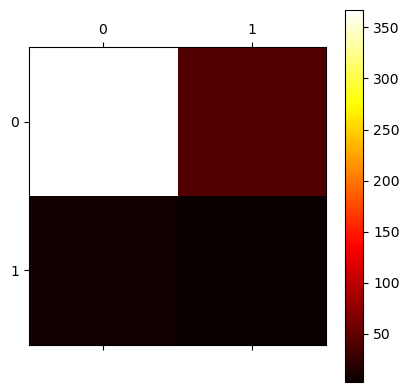

In [20]:
plt.matshow(contingency_table, cmap='hot')
plt.colorbar()
plt.show()

#### 10. Постройте линейную регрессию и определите наиболее значимые характеристики товара, влияющие на рост цены.

In [21]:
X = df[['current', 'voltage', 'supply']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

197067.73546484511